In [26]:
pip install plotly seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
plt.style.use('dark_background')

In [60]:
df = pd.read_csv('./data/processed/cleaned_stocks.csv')
top_stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'ORCL']
df_top = df[df['symbol'].isin(top_stocks)]
df_top.head()

,date,open,high,low,close,volume,symbol,daily_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.010422
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-0.025067
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.001903
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.000899


In [ ]:
# Cumulative returns summary plot

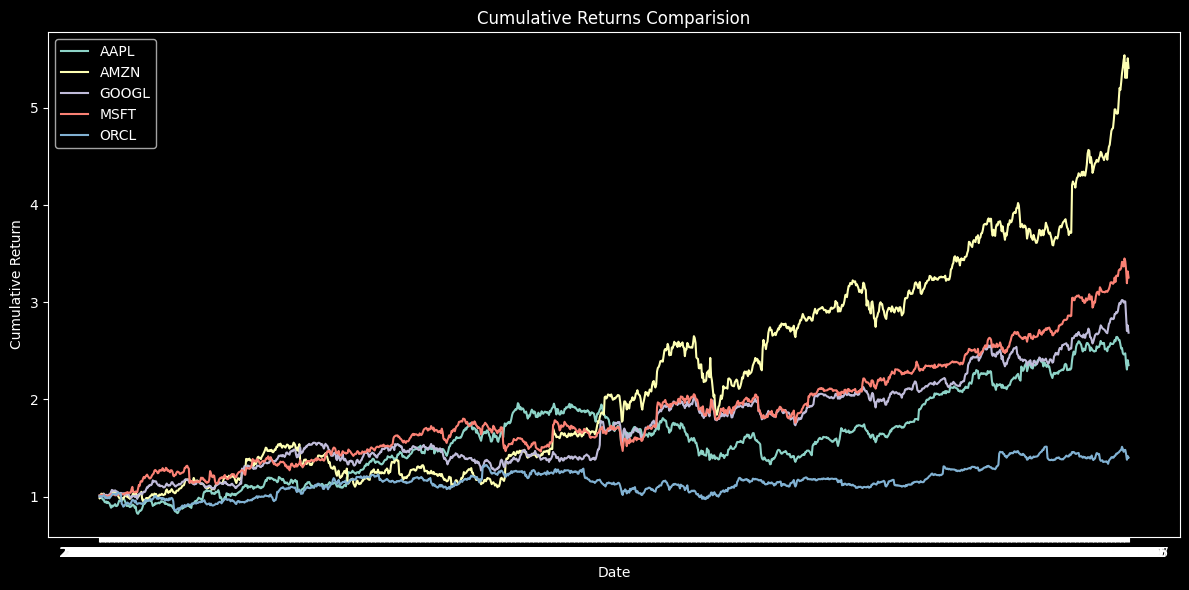

In [62]:
df_top['daily_return'] = df_top.groupby('symbol')['close'].pct_change()
df_top['cumulative_return'] = df_top.groupby('symbol')['daily_return'].transform(lambda x: (1+x).cumprod())

plt.figure(figsize=(12,6))
for symbol in top_stocks:
    temp = df_top[df_top['symbol'] == symbol]
    plt.plot(temp['date'], temp['cumulative_return'], label = symbol)

plt.title("Cumulative Returns Comparision")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('../reports/visuals/cumulative_returns_top_stocks.png')
plt.show()

In [ ]:
# volatality heatmap

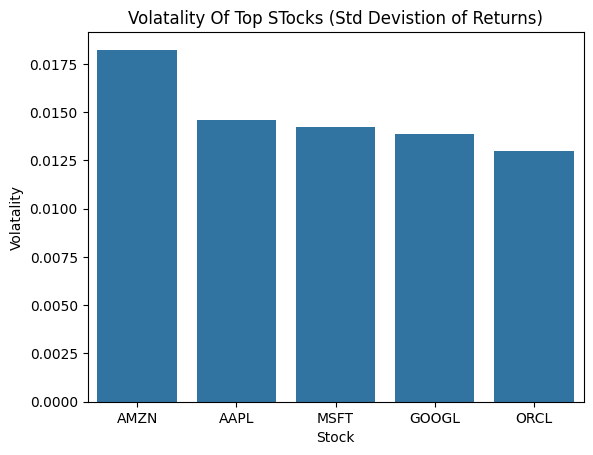

In [38]:
volatality = df_top.groupby('symbol')['daily_return'].std().sort_values(ascending=False)
sns.barplot(x=volatality.index, y = volatality.values)
plt.title("Volatality Of Top STocks (Std Devistion of Returns)")
plt.ylabel("Volatality")
plt.xlabel("Stock")
plt.savefig('../reports/visuals/volatality_dashboard.png')
plt.show()

In [ ]:
# correlation heatmap matrix

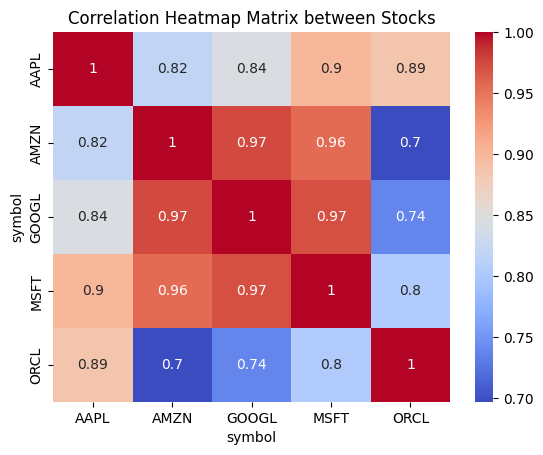

In [41]:
pivot_df = df_top.pivot(index='date', columns='symbol', values='close')
corr = pivot_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Matrix between Stocks")
plt.savefig('../reports/visuals/correlation_dashboard.png')
plt.show()

In [42]:
# comparision of top stocks with the rest of the index

In [52]:
index_df = pd.read_csv('../all_stocks_5yr.csv')
index_df.rename(columns = {'Name': 'symbol'}, inplace = True)
index_df = index_df.sort_values(by=['symbol', 'date'])
index_df['daily_return'] = index_df.groupby('symbol')['close'].pct_change()
# pivot to create matrix of daily returns
market_pivot = index_df.pivot(index='date', columns='symbol', values='daily_return')
market_index = market_pivot.mean(axis=1)
market_cumulative_return = (1 + market_index.fillna(0)).cumprod() #cumulative market index return

In [ ]:
# plotting all together

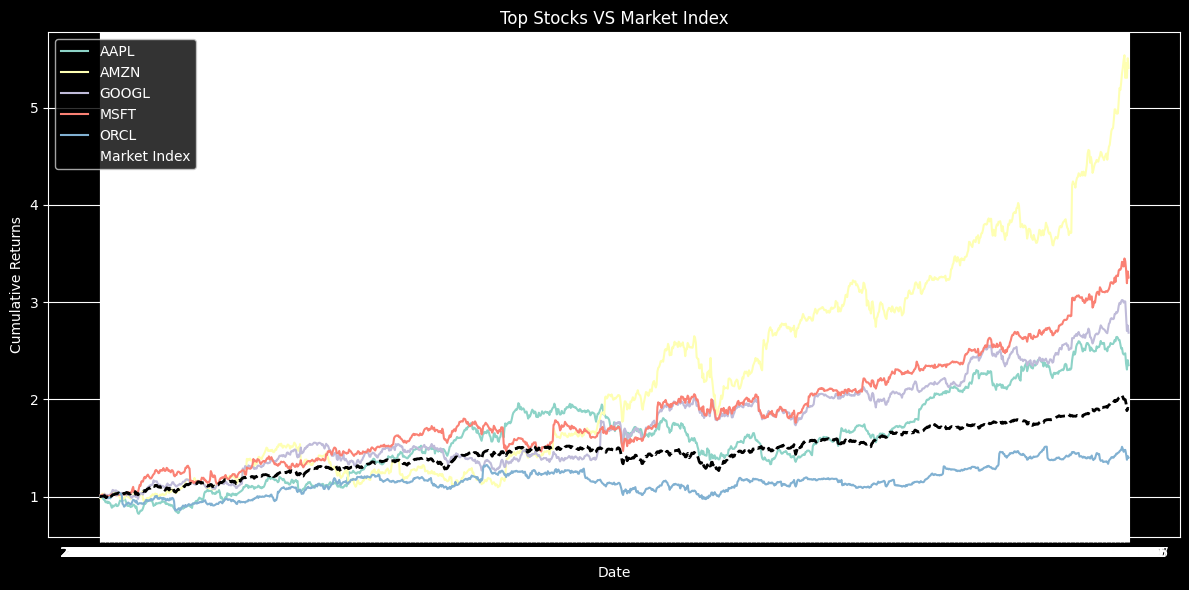

In [63]:
plt.figure(figsize=(12,6))
for symbol in top_stocks:
    temp = df_top[df_top['symbol'] == symbol]
    plt.plot(temp['date'], temp['cumulative_return'], label = symbol)

# plotting market index
plt.plot(market_cumulative_return.index, market_cumulative_return.values, label='Market Index', color='black', linewidth=2, linestyle='--')
plt.title("Top Stocks VS Market Index")
plt.xlabel('Date')
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../reports/visuals/top_stocks_vs_market_index.png')
plt.show()

In [58]:
df_top.to_csv('./data/processed/dashboard_summary_data.csv')

In [ ]:
# here we can see the best and worst performaers of the top stocks selected are AMAZON & ORACLE 
# respectively.